In [170]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")  

In [172]:
#Read the CSV File
df = pd.read_csv('train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [173]:
vc_df = pd.DataFrame(df['y'].value_counts()).reset_index()
vc_df.columns = ['Ans', 'Count']
vc_df['Ans'] = vc_df['Ans'].map({1 : 'yes', 0: 'no'})
vc_df

,Ans,Count
0,NaN,39922
1,NaN,5289


**From above result we can understand it is imbalanced Dataset**

# DATA CLEANING

In [174]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [175]:
#checking for Duplicates
df.duplicated().sum()

6

In [176]:
#droping duplicates
df = df.drop_duplicates()

df.duplicated().sum()

0

In [177]:
#checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

**There are No Null Values in Data** 

In [178]:
# Check tha data Types
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

### Categorical Data

In [179]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Replacing the unknown value 

In [180]:
df['job'] = df['job'].replace('unknown', method='bfill')
df['job'].value_counts()

blue-collar      9786
management       9512
technician       7636
admin.           5208
services         4175
retired          2288
self-employed    1588
entrepreneur     1498
unemployed       1310
housemaid        1254
student           950
Name: job, dtype: int64

In [181]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [182]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

Replacing the Unknown Value

In [183]:
df['education_qual'] = df['education_qual'].replace('unknown', method='bfill')
df['education_qual'].value_counts()

secondary    24186
tertiary     13859
primary       7160
Name: education_qual, dtype: int64

In [184]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [185]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [186]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

### Continous Data

<AxesSubplot:xlabel='age'>

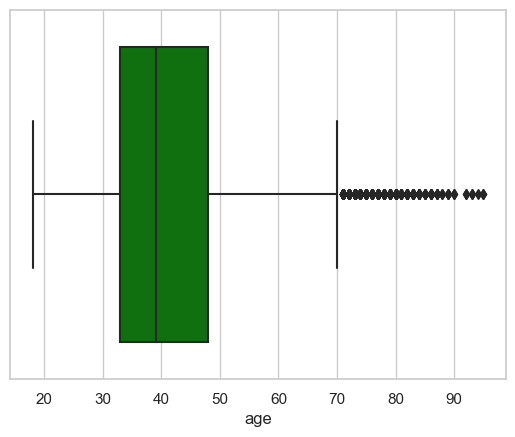

In [187]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='green')

From outlier we can see that there are many dots are displayed outside whisker

In [189]:
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 70.5 Lower bound : 10.5


**Removing the Outlier for age**

<AxesSubplot:xlabel='age'>

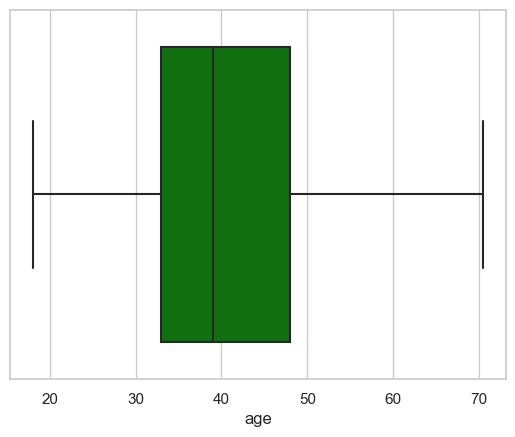

In [190]:
df.age = df.age.clip(10.5,70.5)
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='green')

<AxesSubplot:xlabel='day'>

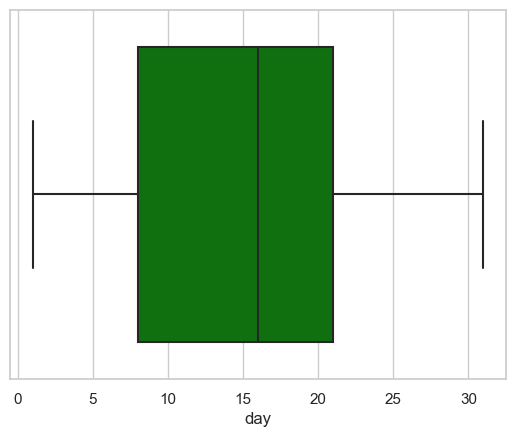

In [191]:
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='green')

<AxesSubplot:xlabel='dur'>

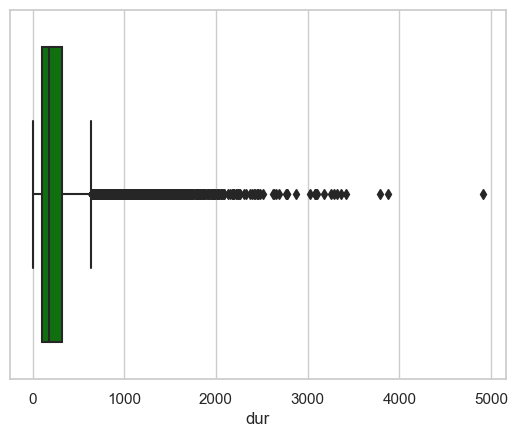

In [192]:
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'], color='green')

In [193]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 643.0 Lower bound : -221.0


**Removing the Outlier for dur**

<AxesSubplot:xlabel='dur'>

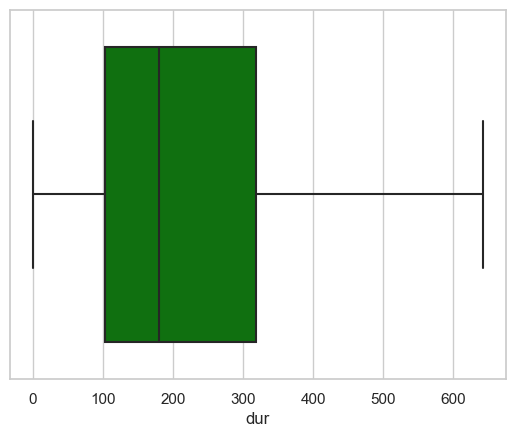

In [194]:
df.dur = df.dur.clip(-221.0,643.0)
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'], color='green')

<AxesSubplot:xlabel='num_calls'>

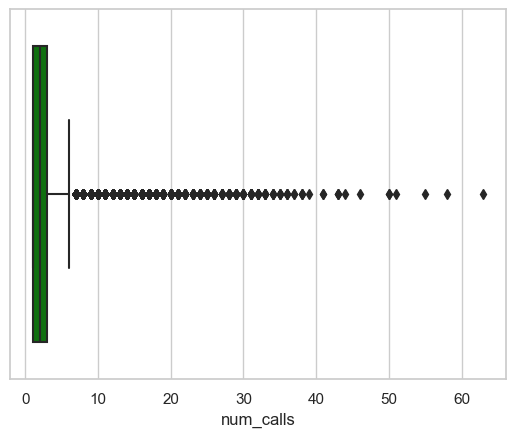

In [195]:
sns.set(style="whitegrid")
sns.boxplot(x=df['num_calls'], color='green')

In [196]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


**Removing the Outlier for num_calls**

<AxesSubplot:xlabel='num_calls'>

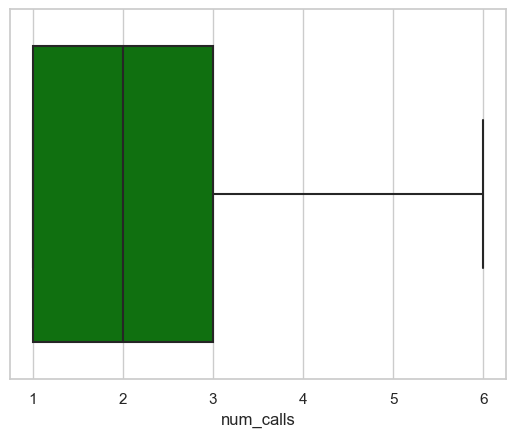

In [197]:
df.num_calls = df.num_calls.clip(-2.0,6.0)
sns.set(style="whitegrid")
sns.boxplot(x=df['num_calls'], color='green')

# EDA - Exploratory Data Analysis

In [198]:
df['target'] = df["y"].map({"yes":1 , "no": 0})
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44.0,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47.0,blue-collar,married,tertiary,unknown,5,may,92.0,1.0,unknown,no,0
4,33.0,management,single,tertiary,unknown,5,may,198.0,1.0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17,nov,643.0,3.0,unknown,yes,1
45207,70.5,retired,divorced,primary,cellular,17,nov,456.0,2.0,unknown,yes,1
45208,70.5,retired,married,secondary,cellular,17,nov,643.0,5.0,success,yes,1
45209,57.0,blue-collar,married,secondary,telephone,17,nov,508.0,4.0,unknown,no,0


Adding a Target Column

## Categorical Variable vs Target Variable

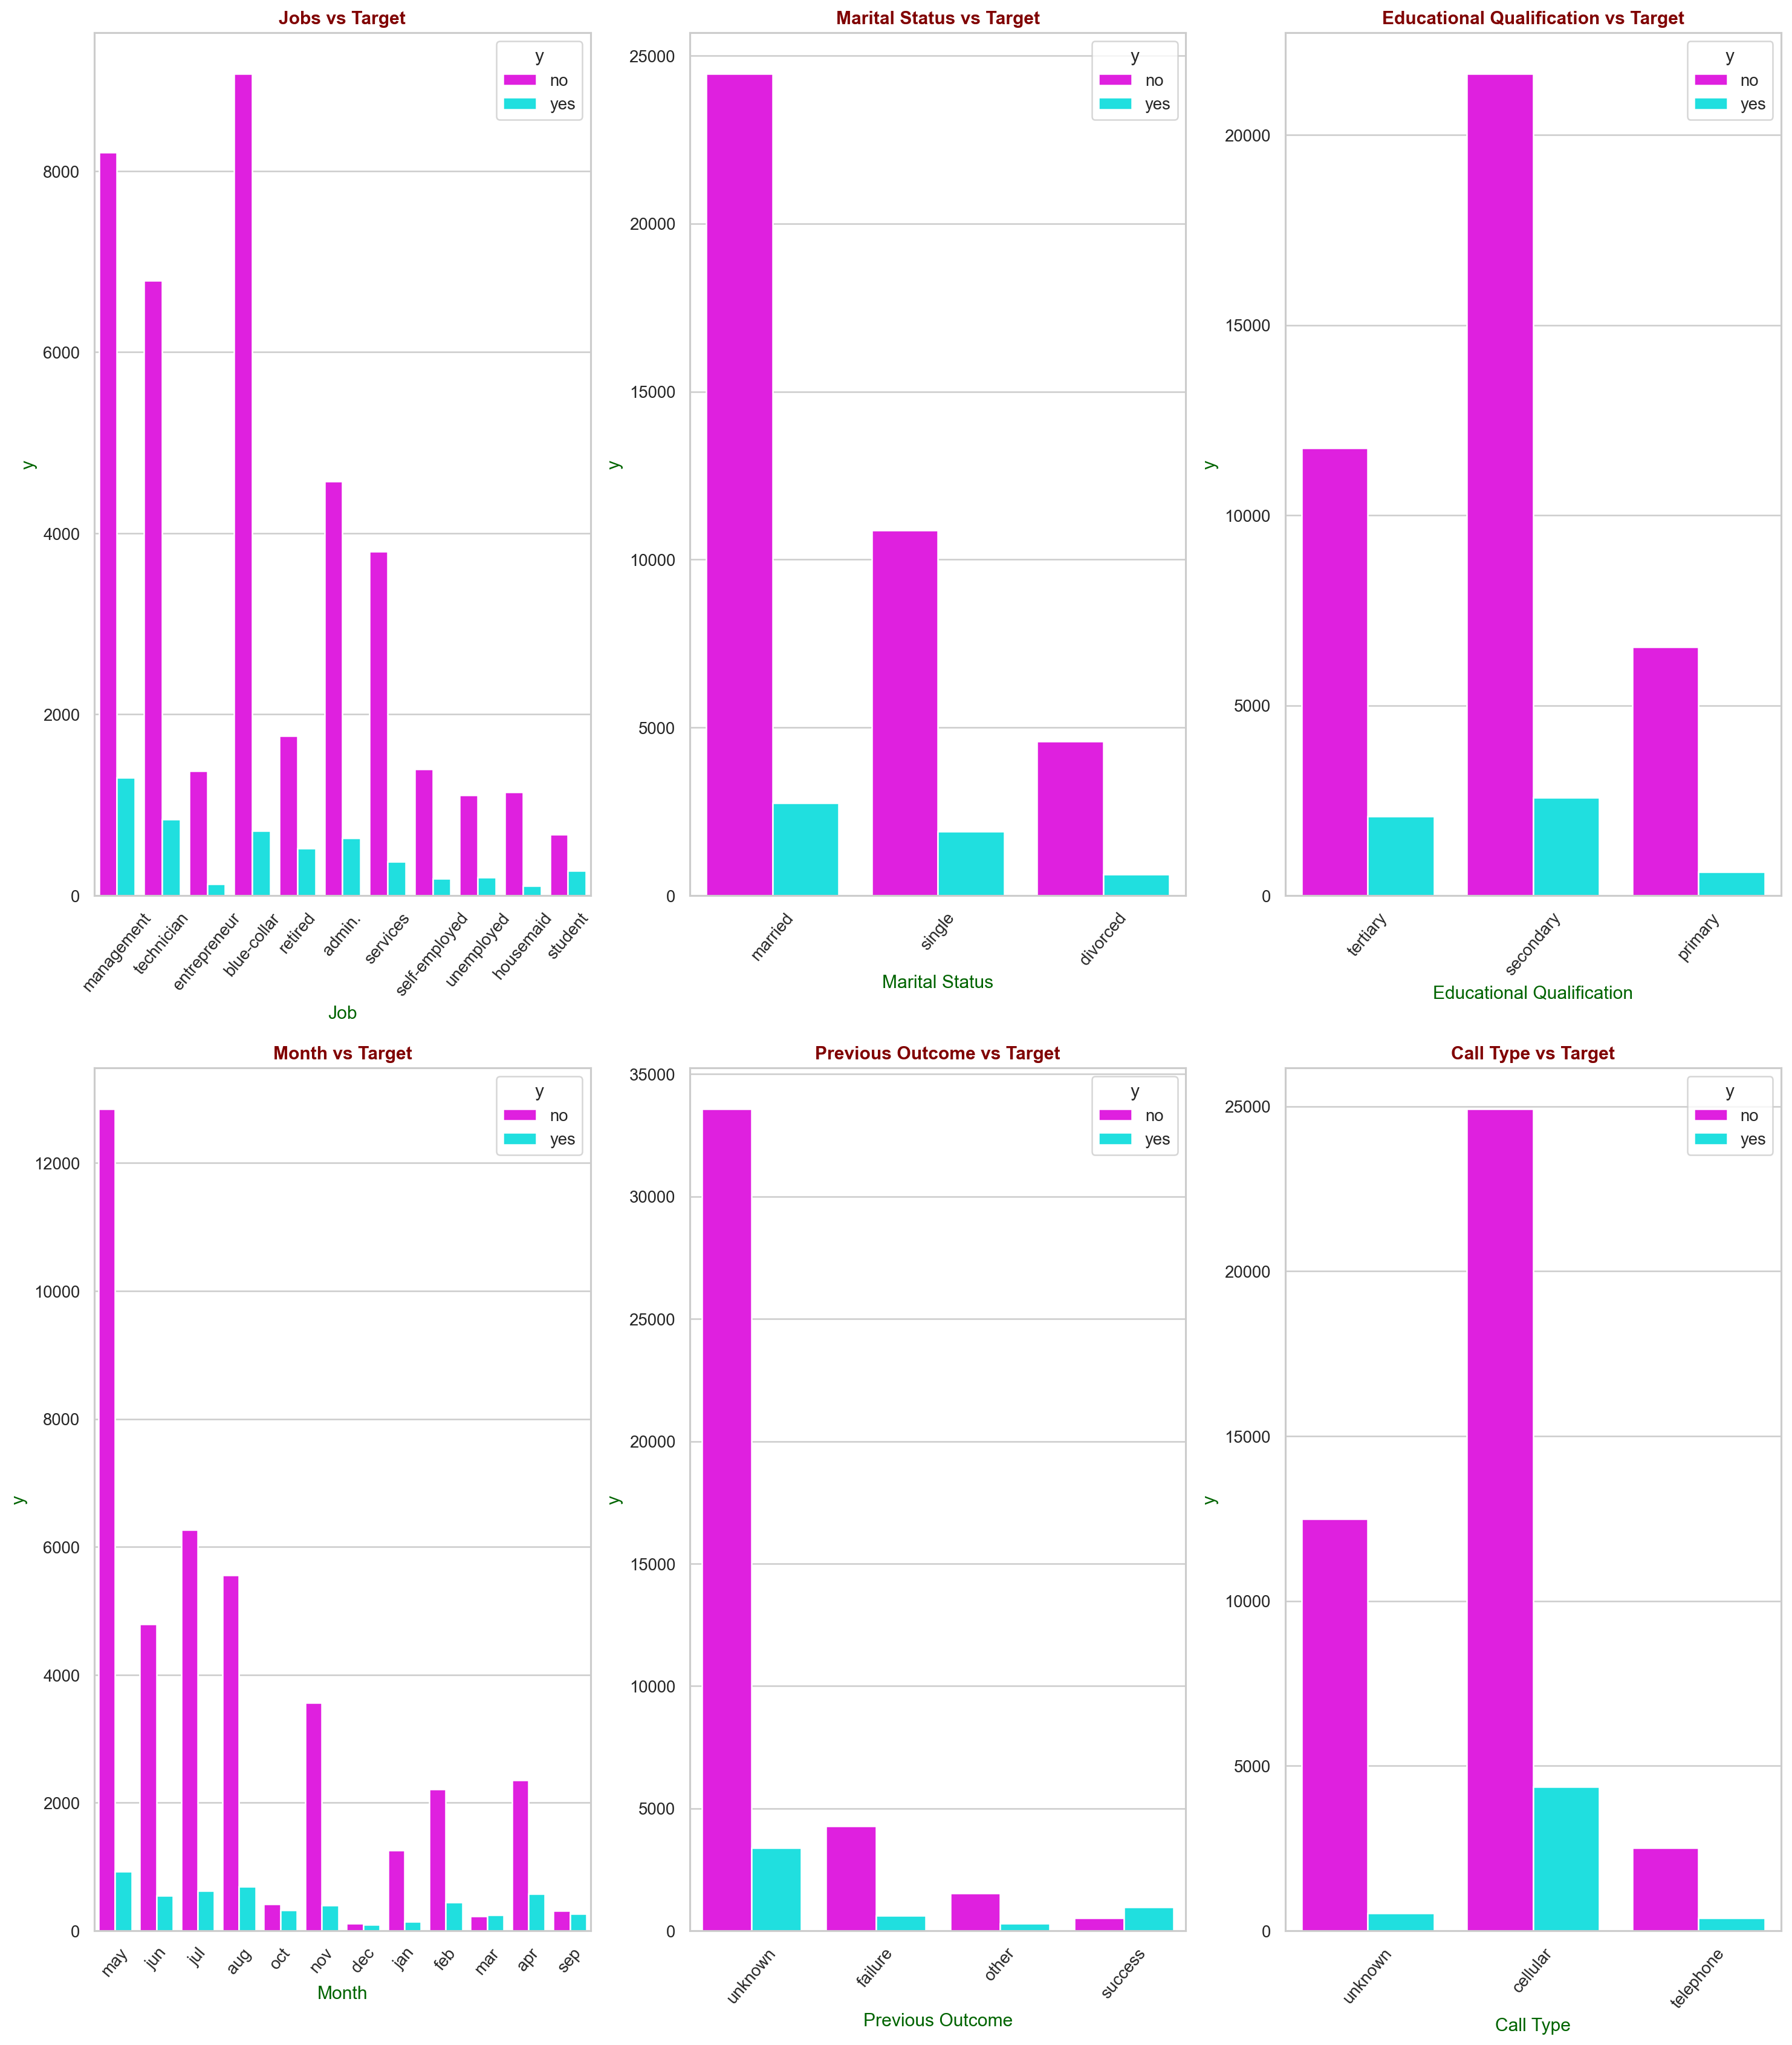

In [199]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='mon',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

     

**Jobs vs Target**
* Target (No) : Blue Collar
* Suscribed (Yes): Management

**Marital Status vs Target**
* Target (No) : Married
* Subscribed (Yes): Married

**Educational Qualification vs Target**
* Target (No): Secondary
* Subscribed (Yes): Secondary

**Month vs Target**
* Target (No): May
* Subscribed (Yes): May

**Previous Outcome vs Target**
* Target (No): unknown
* Subscribed (Yes): unknown

**Call Type vs Target**
* Target (No): Cellular
* Subscribed (Yes): Cellular

## Categorical Variable vs Target

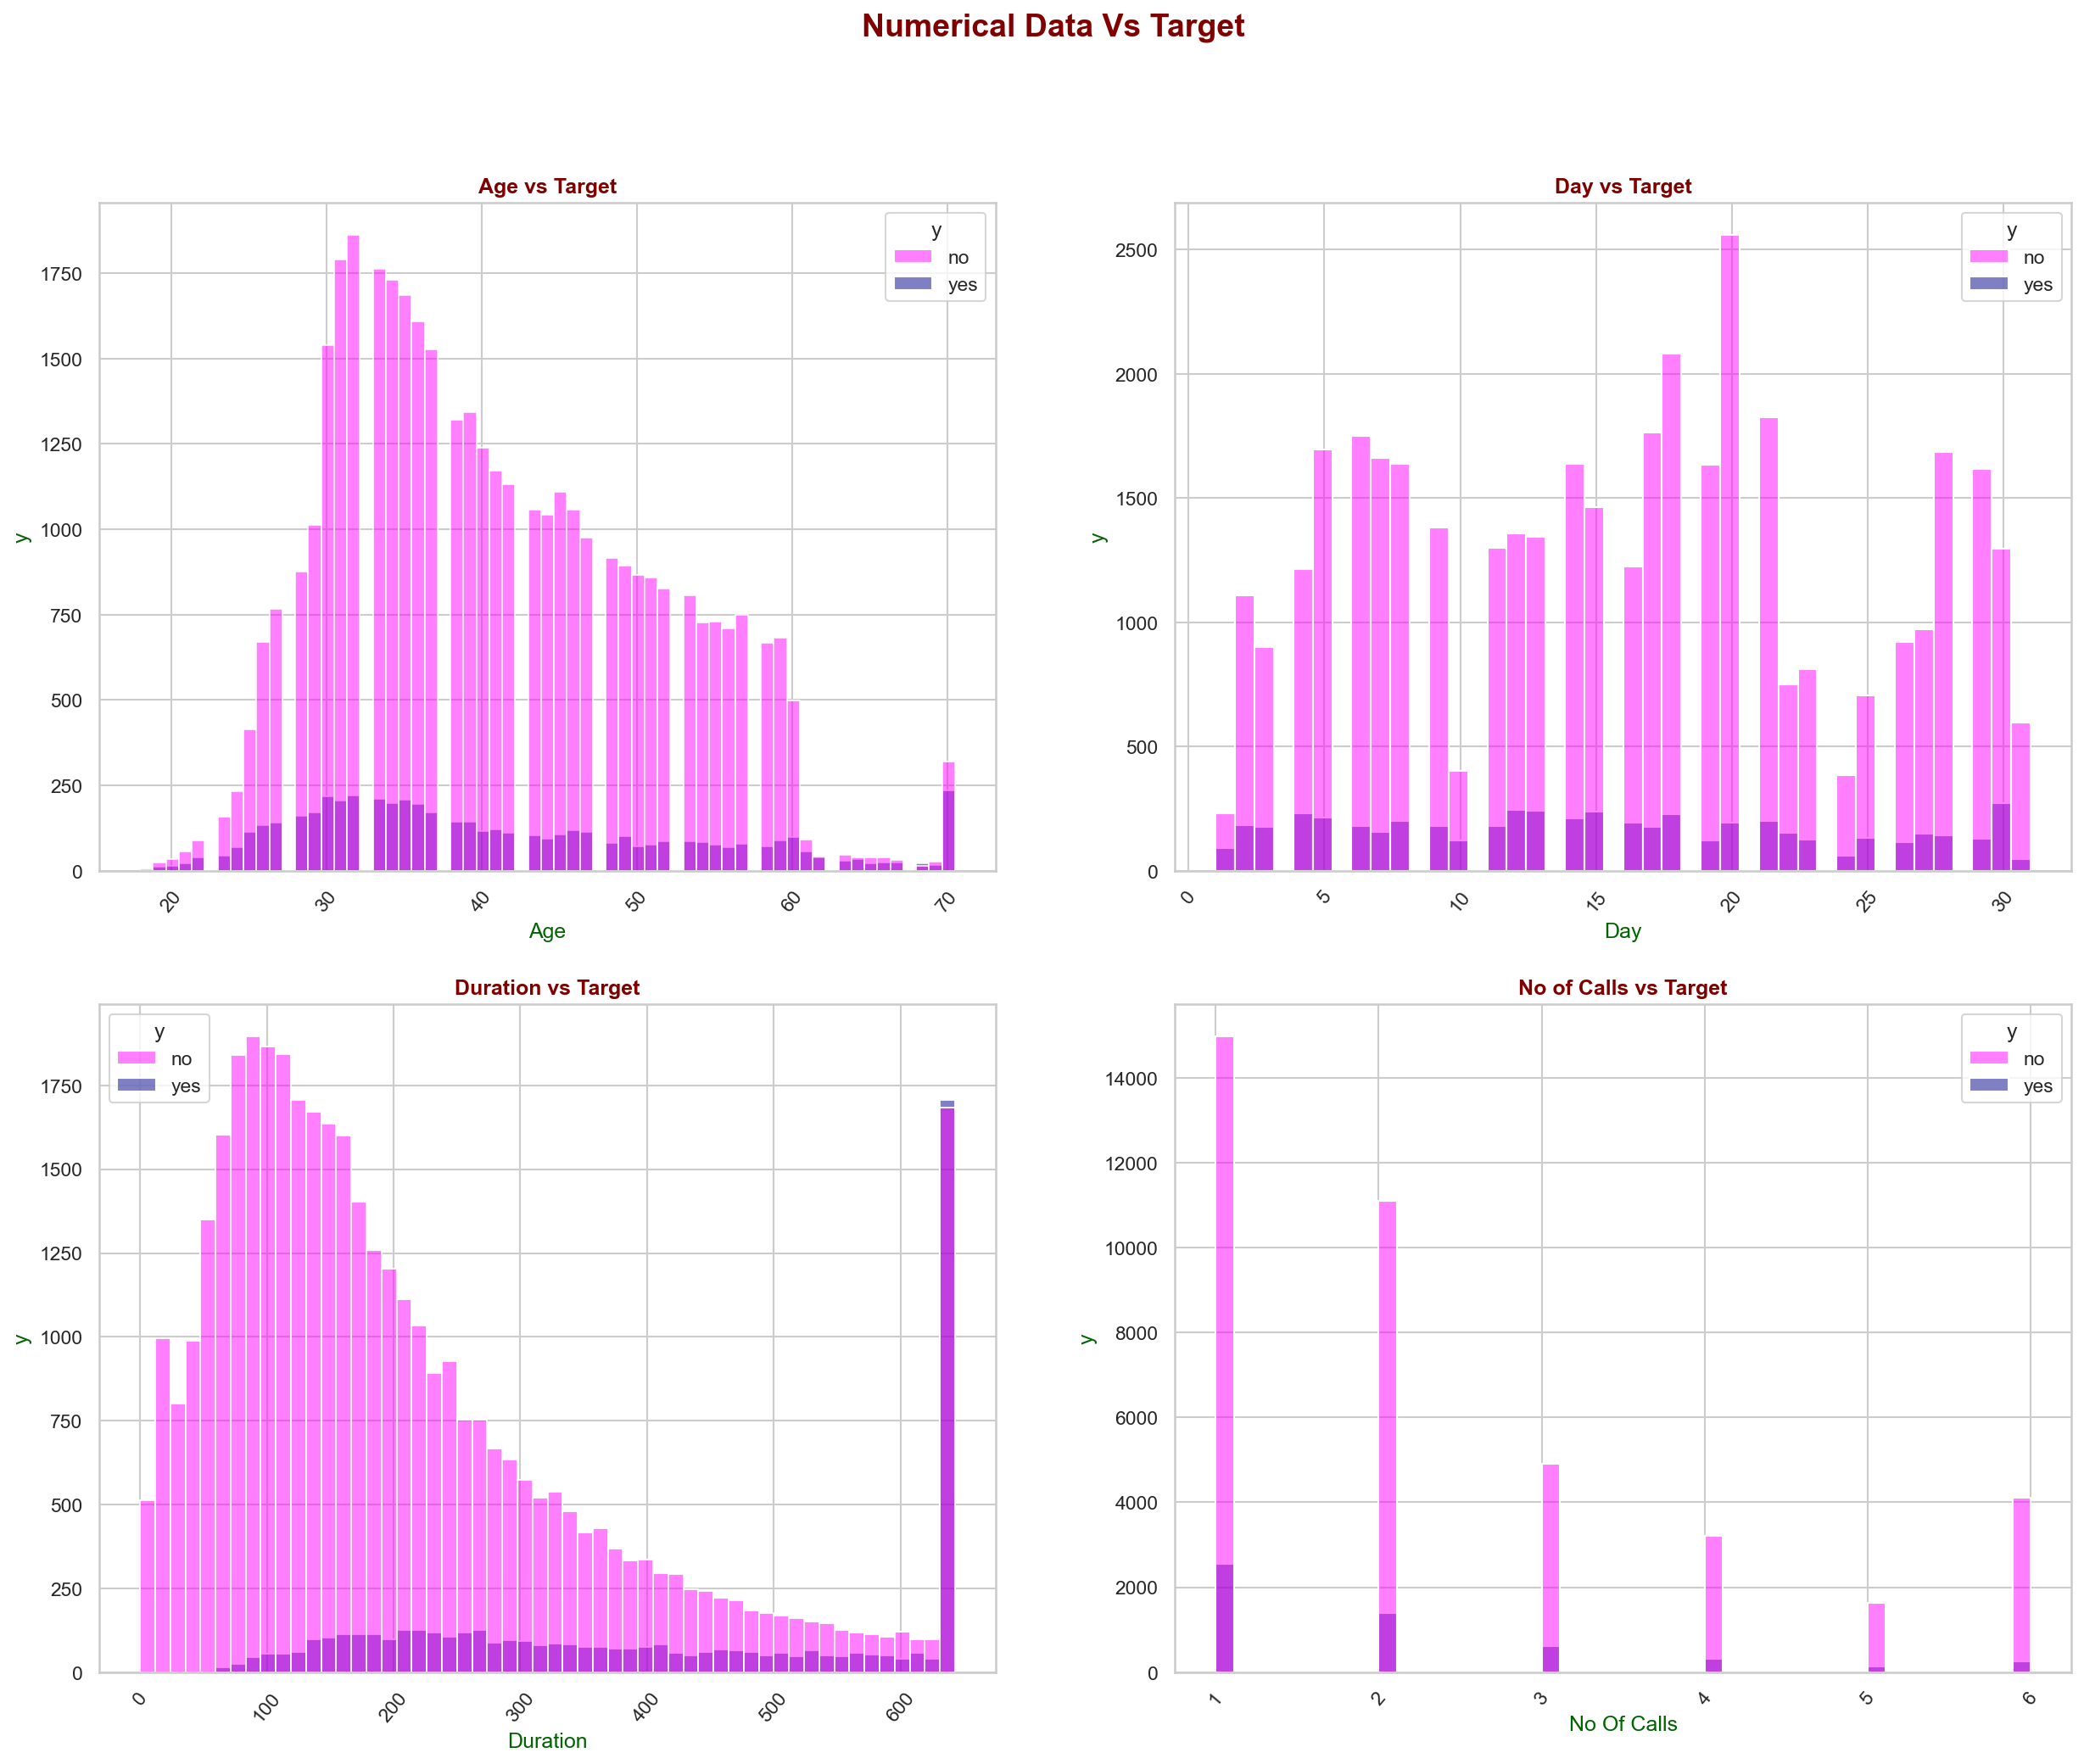

In [135]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot 
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


**Age vs Target**
* Target : Middle age people
* Subscribed : Middle age people

**Day vs Target**
* Target : Middle of Month
* Subscribed : Middle of Month

**Duration vs Target**
* Duration of call is also important to subscribe for insurance.

**No of Calls vs Target**
* No of calls increase subscrition also getting increase.

## Encoding

In [136]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [137]:
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   

df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})

df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})

df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})

df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})

df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})

df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1.0,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1.0,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1.0,1,no,0
3,47.0,1,1,3,1,5,1,92.0,1.0,1,no,0
4,33.0,8,3,3,1,5,1,198.0,1.0,1,no,0


### Feature and Target Selection

In [138]:
# X --> Feature y-- > Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

### Spliting

In [142]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )


### Balancing

In [145]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

print(len(x_train_smt))
print(len(y_train_smt))

54957
54957


### Scaling

In [147]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# Modelling

## Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)
     


0.7764627806658555

In [149]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.00204081, 0.99795919],
       [0.56599193, 0.43400807],
       [0.55132738, 0.44867262],
       ...,
       [0.96724868, 0.03275132],
       [0.45710535, 0.54289465],
       [0.47749992, 0.52250008]])

In [150]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.9


## K-Nearest Neighbour (KNN)

In [153]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))


K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8743485063315894
K value : 2 Train Score :  0.9950688720272213 Cross Value Accuracy : 0.8890605290177479
K value : 3 Train Score :  0.9765271030078061 Cross Value Accuracy : 0.8874009925194347
K value : 4 Train Score :  0.9765271030078061 Cross Value Accuracy : 0.8906085904268322
K value : 5 Train Score :  0.9658278290299689 Cross Value Accuracy : 0.89204652129272
K value : 6 Train Score :  0.9672289244318285 Cross Value Accuracy : 0.8929312325820172
K value : 7 Train Score :  0.9599868988481904 Cross Value Accuracy : 0.8944789272967292
K value : 8 Train Score :  0.9588951361973906 Cross Value Accuracy : 0.893262602063267
K value : 9 Train Score :  0.953873028003712 Cross Value Accuracy : 0.8961382193321272
K value : 10 Train Score :  0.9529268337063522 Cross Value Accuracy : 0.8948112746296386
K value : 20 Train Score :  0.9368597266954164 Cross Value Accuracy : 0.8933740771524958
K value : 30 Train Score :  0.9290718197863784 Cr

k=9 is a good cross validation accuracy of 0.896

In [154]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))


KNN Score:  0.8054418758986838
AUROC on the sampled dataset :  0.4981502142437728


## Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [156]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))


Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.8108347645195979


In [157]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7784085739760176  Cross val score :  0.8817608663765707
Depth  :  2  Training Accuracy :  0.8295576541659843  Cross val score :  0.8904999266611254
Depth  :  3  Training Accuracy :  0.869079462124934  Cross val score :  0.8951442331198358
Depth  :  4  Training Accuracy :  0.8943173754025875  Cross val score :  0.8992365423165305
Depth  :  5  Training Accuracy :  0.9073457430354641  Cross val score :  0.8962501833471863
Depth  :  6  Training Accuracy :  0.9222119111305203  Cross val score :  0.8972458807998827
Depth  :  7  Training Accuracy :  0.9362410611932965  Cross val score :  0.8925997408693103
Depth  :  8  Training Accuracy :  0.945848572520334  Cross val score :  0.8916052657311886
Depth  :  9  Training Accuracy :  0.9525811088669324  Cross val score :  0.8907200655160612
Depth  :  10  Training Accuracy :  0.9624069727241298  Cross val score :  0.8862957756808292
Depth  :  20  Training Accuracy :  0.9994359226304201  Cross val score :  0.87269

Depth=4 is a good cross validation accuracy of 0.899

In [158]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))


Decision Tree Score :  0.9073457430354641
AUROC on the sampled dataset :  0.8805658438773312


## XG Boost

In [161]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9370962752697564  Cross-Val score :  0.9033286070503104
Learning rate :  0.02  Train score :  0.9496151536655931  Cross-Val score :  0.9032183542756564
Learning rate :  0.03  Train score :  0.9575122368397111  Cross-Val score :  0.9048775240795971
Learning rate :  0.04  Train score :  0.9634077551540295  Cross-Val score :  0.9042141739598103
Learning rate :  0.05  Train score :  0.9678657859781283  Cross-Val score :  0.9045452989781451
Learning rate :  0.1  Train score :  0.9762177702567462  Cross-Val score :  0.9071996773089521
Learning rate :  0.11  Train score :  0.9778918063213058  Cross-Val score :  0.9053190241040433
Learning rate :  0.12  Train score :  0.9786196480885055  Cross-Val score :  0.9064255854886815
Learning rate :  0.13  Train score :  0.9789471768837454  Cross-Val score :  0.9058724881435486
Learning rate :  0.14  Train score :  0.9799297632694652  Cross-Val score :  0.9059826186867452
Learning rate :  0.15  Train score :  0.9

Learning Rate 0.1 is getting the best cross validation score of 0.907

## Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [163]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.9994359226304201  Cross val score :  0.883309366291431
Depth  :  2  Training Accuracy :  0.9994359226304201  Cross val score :  0.8846089080326189
Depth  :  3  Training Accuracy :  0.9994359226304201  Cross val score :  0.88947559888041
Depth  :  4  Training Accuracy :  0.9994359226304201  Cross val score :  0.8929598216142554
Depth  :  5  Training Accuracy :  0.9994359226304201  Cross val score :  0.8955314643118412
Depth  :  6  Training Accuracy :  0.9994359226304201  Cross val score :  0.8977987734909633
Depth  :  7  Training Accuracy :  0.9994359226304201  Cross val score :  0.9006747497070128
Depth  :  8  Training Accuracy :  0.9994359226304201  Cross val score :  0.9010896109448744
Depth  :  9  Training Accuracy :  0.9994359226304201  Cross val score :  0.9020572331125634
Depth  :  10  Training Accuracy :  0.9994359226304201  Cross val score :  0.902886596235574


Depth = 10 is giving the good cross validation score fo 0.902

# Solution Statement

Models are tested, below are the AUROC value of each model

* Logistic Regression - AUROC Score is 0.9
* KNN - AUROC Score is 0.498
* Decision Tree - AUROC Score is 0.88
* XG Boost - AUROC Score is 0.907
* Random Forest - AUROC Score is 0.902

Hence XG Boost is giving the good AUROC Score of 0.907, so XG Boost is the best model for customer convertion prediction

# Conclusion

Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

* Duration - Longer the call better influncing the clients
* Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.
* Day - People who subscribed to insurance are mostly mid of the month.
* Month - In the month of may people subscribed to insurance are more.
* Job - In this blue collar people are targeted more but people who subscribed more are from management job.